# Conducción en 1D

#### Claudio Santiago Perez Ruiz 

##### Ejercicio 1

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
TA = 1.0
TB = 1.0
L = 1.0
S = 0
K = 1.0
N = 21

In [15]:
def buildmatrix(N, d):
    M = np.zeros((N,N))
    
    for i in range(0, N-1):
        
        M[i+1,i]= -1
        M[i,i+1]= -1
        
    for i in range(0,N):
        
        M[i,i]= 2-d
        
    return M    
    

In [16]:
def conduccion_1d(K, S, L, TA, TB, N, W):
    
    
    h = L/(N+1)
    r = K/h**2
    d = (W**2)/r
    
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = buildmatrix(N,d)
    
    
    b[:] = S/r
    b[0] += TA
    b[-1] += TB
    
    T[0] = TA
    T[-1] = TB
    
    T[1:N+1] = np.linalg.solve(A,b)
    
    x = [h * i for i in range(1, N +1)]
    x.insert(0, 0)
    x.append(L)
    
    print('Los valores obtenidos de la temp fueron: ')
    print("")
    print(T)
    plt.plot(x, T, 'o-', color="black")
    plt.plot(x,T)
    plt.xlabel('$x$')
    plt.ylabel('$T$')
    plt.show()
    
    

Los valores obtenidos de la temp fueron: 

[ 1.          1.30272968  1.43942855  1.39267454  1.16842639  0.79526416
  0.32074678 -0.19464927 -0.68523757 -1.08849344 -1.35302256 -1.44511112
 -1.35302256 -1.08849344 -0.68523757 -0.19464927  0.32074678  0.79526416
  1.16842639  1.39267454  1.43942855  1.30272968  1.        ]


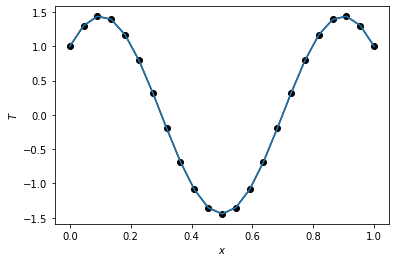

In [17]:
W = 2.5*np.pi

conduccion_1d(K, S, L, TA, TB, N, W)


In [18]:
def solExact(x, W):
    x = np.array(x)
    return ((1.0 - np.cos(W))/np.sin(W))* np.sin(W*x) + np.cos(W*x)

In [19]:
def conducc_1d_2(K, S, L, TA, TB, N, W):
    
    
    h = L/(N+1)
    r = K/h**2
    d = (W**2)/r
    
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = buildmatrix(N,d)
    
    
    b[:] = S/r
    b[0] += TA
    b[-1] += TB
    
    T[0] = TA
    T[-1] = TB
    
    T[1:N+1] = np.linalg.solve(A,b)
    x = [h * i for i in range(1, N +1)]
    x.insert(0, 0)
    x.append(L)
    
    Error = np.linalg.norm(solExact(x,W)-T,2)
    
    plt.title(r"Ecuación: $\frac{\partial^2u(x)}{\partial x^2}$ = $\omega^2$u(x); u(a)=u(b)=1")
    plt.plot(x, solExact(x,W),
            color="red",
            label= r'Solución. Analítica')
    
    plt.plot(x, T, marker= "o", color= "blue", linestyle= "None",
            label= f"Solución. Numérica: (h= {round(h, 7)})= {round(Error, 4)}")
    
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.legend(loc="best", bbox_to_anchor=(1.1, 0.9))
    plt.show()
    
    
    

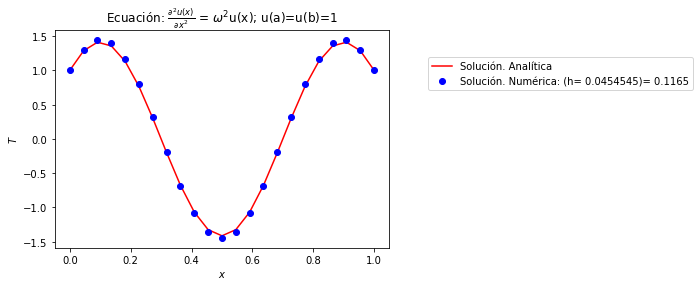

In [20]:
conducc_1d_2(K, S, L, TA, TB, N, W)

#### Ejercicio 2

#### Ejercicio 1.4

In [26]:
def backwardFD(u,x,h):
    return (u(x)-u(x-h))/h

def forwardFD(u,x,h):
    return(u(x+h)-u(x))/h

def centeredFD(u,x,h):
    return (u(x+h)-u(x-h))/(2*h)

def D2l(u,x,h):
    return(3*u(x)-4*u(x-h)+u(x-2*h))/(2*h)

def D2r(u,x,h):
    return(-3*u(x)+4*u(x-h)-u(x+2*h))/(2*h)

def D3(u,x,h):
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)


    
    

In [27]:
x = np.ones(5)
u = np.sin
h = np.array([0.100, 0.050, 0.010, 0.005, 0.001])

In [28]:
eb = np.fabs(np.cos(x)- backwardFD(u,x,h))

ef = np.fabs(np.cos(x) - forwardFD(u,x,h))

ec = np.fabs(np.cos(x) - centeredFD(u,x,h))

e2l = np.fabs(np.cos(x) - D2l(u,x,h))

e2r = np.fabs(np.cos(x) - D2r(u,x,h))

e3 = np.fabs(np.cos(x) - D3(u,x,h))

In [29]:
Error = pd.DataFrame(np.array([h, ef, eb, ec, e2l, e2r, e3]).transpose(),
                    columns=["$h$", "$D_-$", "$D_+$", "$$D_0", "$D_{-2}$", "$D_{+2}$", "$D_3$"])
print(Error)

     $h$     $D_-$     $D_+$         $$D_0      $D_{-2}$  $D_{+2}$  \
0  0.100  0.042939  0.041138  9.000537e-04  2.004728e-03  2.156024   
1  0.050  0.021257  0.020807  2.250978e-04  4.761431e-04  2.159885   
2  0.010  0.004216  0.004198  9.004993e-06  1.821981e-05  2.161155   
3  0.005  0.002106  0.002101  2.251257e-06  4.528776e-06  2.161196   
4  0.001  0.000421  0.000421  9.005045e-08  1.803108e-07  2.161209   

          $D_3$  
0  6.820693e-05  
1  8.649142e-06  
2  6.994130e-08  
3  8.754000e-09  
4  6.997947e-11  


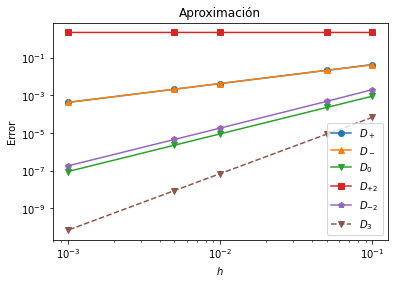

In [30]:
plt.plot(h, ef, "o-", label="$D_+$")
plt.plot(h, eb, "^-", label="$D_-$")
plt.plot(h, ec, "v-", label="$D_0$")
plt.plot(h, e2r, "s-", label="$D_{+2}$")
plt.plot(h, e2l, "p-", label="$D_{-2}$")
plt.plot(h, e3, "v--", label ="$D_3$")




plt.xlabel("$h$")
plt.ylabel("Error")
plt.title("Aproximación")
plt.legend()
plt.loglog()
plt.show()
